<a href="https://colab.research.google.com/github/ilyaGaliullinAdey201/lab/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ПРИМЕРЧИКИ

In [ ]:
from scipy import integrate

In [ ]:
 help(integrate.quad)

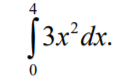

In [ ]:
from scipy import integrate

In [ ]:
def f(x):
  return 3.0 * x**2

In [ ]:
 integrate.quad(f, 0.0, 4.0)

(64.0, 7.105427357601002e-13)

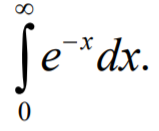

In [ ]:
import numpy as np

def f2(x):
   return np.exp(-x)

integrate.quad(f2, 0.0, np.inf)

(1.0000000000000002, 5.842606742906004e-11)

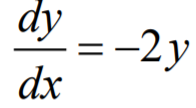

c начальным условием y(0) = 1.

In [ ]:
from scipy import integrate
import numpy as np

def f(y, x):
  return -2.0 * y

xi = np.linspace(0, 1, 10)
y0 = 1.0
sol = integrate.odeint(f, y0, xi)
sol


array([[1.        ],
       [0.80073742],
       [0.64118042],
       [0.51341714],
       [0.41111231],
       [0.329193  ],
       [0.26359714],
       [0.21107209],
       [0.16901331],
       [0.13533527]])

In [ ]:
sol[0]

array([1.])

In [ ]:
sol[9]

array([0.13533527])

Пример решения системы двух ОДУ
Рассмотрим уравнение гармонических колебаний
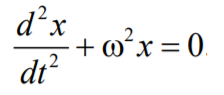

c начальными условиями x(0) = x0 = –5, dx/dt(0) = v0 = 0 при ω =1.5.
Сведём данное уравнение второго порядка к системе двух уравнений первого порядка с помощью замены
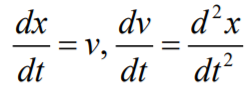

Тогда получим
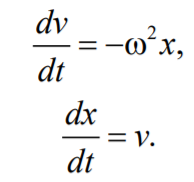

С начальными условиями x(0) = x0, v(0) = v0.

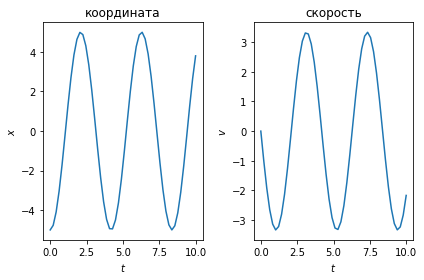

In [ ]:
# подключение модуля integrate из библиотеки scipy
from scipy import integrate
# подключение библиотеки numpy под псевдонимом np
import numpy as np
# подключение модуля pyplot из библиотеки matplotlib
# под псевдонимом plt
from matplotlib import pyplot as plt
# частота гармонического осциллятора
w = 1.5
# вектор-функция правых частей уравнений:
# f = [f0, f1], где f0 = -w^2*x, f1 = v.
# полагается, что f зависит от (y, t), причём y - это
# список из двух чисел:
# y = [v, x]

def f(y, t):
 v = y[0]
 x = y[1]

 f0 = -w**2 * x
 f1 = v
 return [f0, f1]

# массив точек интегрирования
ti = np.linspace(0, 10, 50)
# начальная координата
x0 = -5.0
# начальная скорость
v0 = 0.0
# список начальных условий
y0 = [x0, v0]
# решение ОДУ
sol = integrate.odeint(f, y0, ti)
# рисунок для построения графиков функций x(t) и v(t)
fig = plt.figure()
# панель для рисования графика координаты
ax1 = fig.add_subplot(121)
# панель для рисования графика скорости
ax2 = fig.add_subplot(122)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$x$')
ax1.set_title('координата')
# график x(t) - зависимость нулевого столбца вектора
# решения sol от ti
ax1.plot(ti, sol[:, 0])
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$v$')
ax2.set_title('скорость')
# график v(t) - зависимость первого столбца вектора
# решения sol от ti
ax2.plot(ti, sol[:, 1])
# настройка оптимального расположения панелей
plt.tight_layout()
fig.savefig("ode2.png")

пример программы с использованием interp1d()

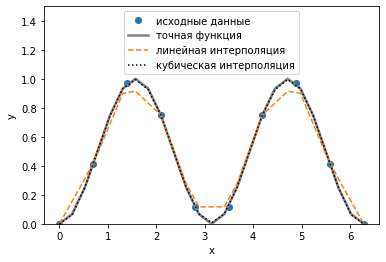

In [ ]:
#подключение библиотек
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# функция для генерации данных,
# по которым будет строиться интерполяция
def f_exact(x):
 return np.sin(x)**2

# массив координат, по которым будет делаться интерполяция
x = np.linspace(0, 2.0 * np.pi, 10)
# массив значений, по которым будет делаться интерполяция
y = f_exact(x)
# интерполяция данных методом по умолчанию
# (линейная интерполяция)
fi_1 = interp1d(x, y)
# кубическая интерполяция
fi_2 = interp1d(x, y, 'cubic')
# массив координат для построения
# графика интерполированных функций
xi = np.linspace(0, 2.0 * np.pi, 25)
# массивы значений интерполированых функций
# для построения графиков
yi_1 = fi_1(xi)
yi_2 = fi_2(xi)
# настройки осей
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0.0, 1.5)
# рисование графиков
plt.plot(x, y, 'o', label='исходные данные')
plt.plot(xi, f_exact(xi), '-', color='grey', linewidth=2.5,
label='точная функция')
plt.plot(xi, yi_1, '--', label='линейная интерполяция')
plt.plot(xi, yi_2, 'k:', label='кубическая интерполяция')
# легенда, располагающаяся сверху по центру панели
plt.legend(loc='upper center')
plt.show()

ИНДИВИДУАЛЬНОЕ ЗАДАНИЕ. Вариант 1.

1. Напишите программу для численного вычисления определённого интеграла с помощью средств SciPy. Сравните результаты вычисления различными функциями интегрирования с точным решением.
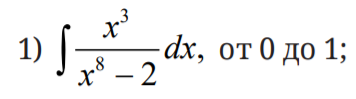

In [ ]:
from scipy import integrate

def func(x):
  return x ** 3 / (x ** 8 - 2)

integrate.quad(func, 0.0, 1.0)

(-0.15580631003505763, 1.3706114467140702e-12)

Теперь сравним наш ответ, полученный с помощью  средств SciPy с точным решением. Для этого используем калькулятор интегралов (сайт https://www.integral-calculator.ru/)

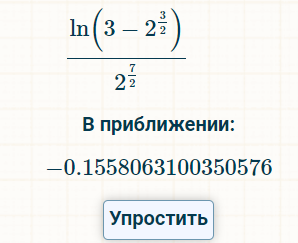

Как мы видим, наш ответ даже более точный.

Теперь попробуем решить этот интеграл средствами python, но не используя SciPy. Буду использовать библиотеку sympy.

In [ ]:
import sympy as sym
x = sym.Symbol('x')
print(sym.integrate(x ** 3 / (x ** 8 - 2), (x, 0, 1)).evalf())

-0.155806310035058 + 0.e-21*I


Сделаем справедливый вывод о том, что библиотека SciPy попогла нам получить более точное значение, нежели sympy.

2. Напишите программу для численного решения обыкновенного дифференциального уравнения с заданным начальным условием с помощью средств SciPy. Сравните результат вычисления
с точным решением. Нарисуйте графики точного и численного решений, а также относительной ошибки численного решения.

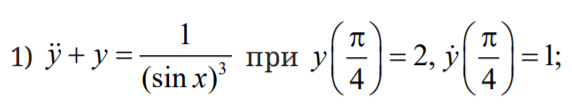

Попробуем использовать библиотеку sympy для решения ОДУ

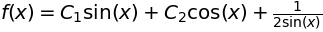

In [ ]:
"""import numpy as np
from sympy import *
import matplotlib.pyplot as plt"""

import numpy as np
from sympy import *
from IPython.display import *
import matplotlib.pyplot as plt
init_printing(use_latex=True)

var('x C1 C2')


x = Symbol('x')
y = Symbol('y')
f = Function('f')

#решаем ДУ и печатаем результат
deq = Eq(f(x).diff(x,x)+f(x), 1/sin(x) ** 3)
dem = dsolve(deq, f(x))
display(dem)


In [ ]:
"""Найдем постоянные C1 и C2, которые удовлетворяют начальным условиям.
Вначале выполним подстановку x=pi/4 в правую часть полученного выражения
dem. Здесь метод rhs (right hand side) выбирает правую часть символьного
выражения."""

eq1=dem.rhs.subs(x,pi/4)
display(eq1)

In [ ]:
#Дифференцируем правую часть выражения dem, и делаем подстановку x=pi/4.
eq2=dem.rhs.diff(x).subs(x,pi/4)
eq2

In [ ]:
"""Выражения eq1 и eq2 должны равняться 2 и 1 (начальным значениям). Решаем
систему уравнений относительно неизвестных C1 и C2."""

seq=solve([eq1-2,eq2-1],C1,C2)
seq

In [ ]:
"""Строим результирующее выражение, которое представляет решение нашей
задачи, и «красиво» его печатаем."""

rez=dem.rhs.subs([(C1,seq[C1]),(C2,seq[C2])])
F = Lambda(x,rez)
display(Latex('$f(x) = ' + str(latex(F(x))) + '$'))

<IPython.core.display.Latex object>

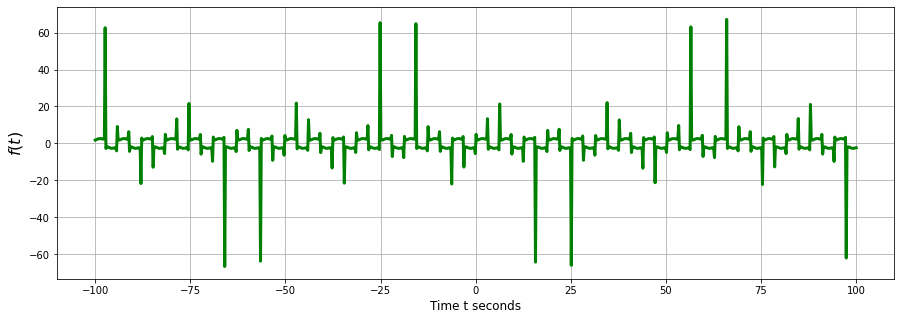

In [ ]:

f=lambdify(x, rez, "numpy")
fig = plt.figure(figsize=(15, 5))
x = np.linspace(-100,100,1000)
plt.grid(True)
plt.xlabel('Time t seconds',fontsize=12)
plt.ylabel('$f(t)$',fontsize=16)
plt.plot(x,f(x),color='#008000', linewidth=3)
plt.show()

Такое решение совпадает с решением онлайн-калькулятора (https://www.kontrolnaya-rabota.ru/)



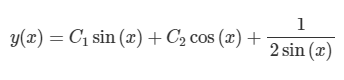

И сам наш ответ совпал с решением калькулятора. И график совпал. Библиотека sympy решает медленно, это чувствуется при запуске программе, но решение понятное, локаничное и удобное.

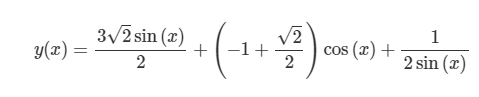

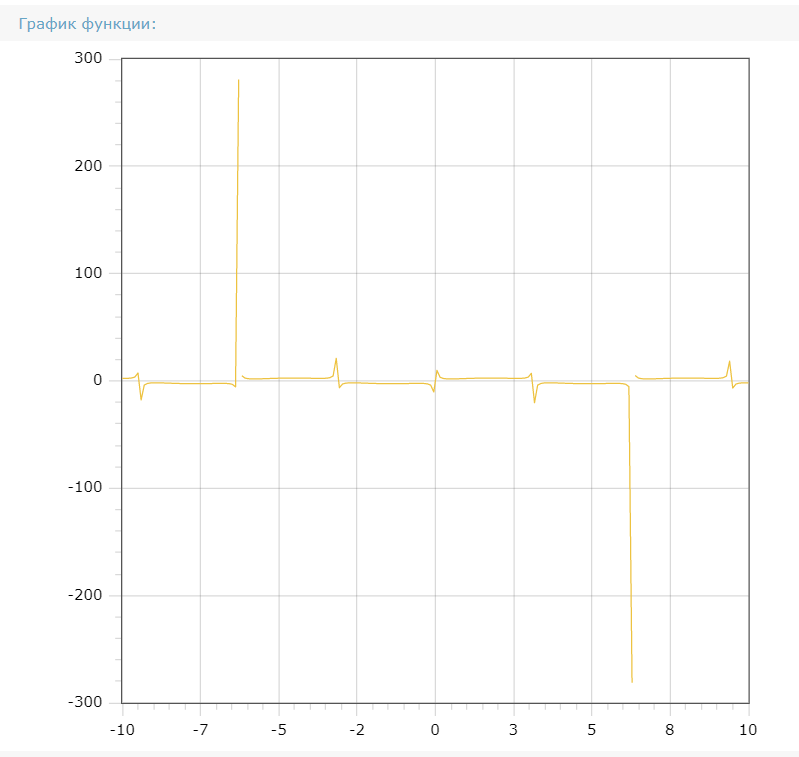

In [ ]:
from scipy import integrate
import numpy as np
from matplotlib import  pyplot as plt

In [ ]:
# вектор-функция правых частей уравнений:
# f = [f0, f1], где f0 = -y + 1/sin(t)^3, f1 = v.
# полагается, что f зависит от (yf, t), причём yf - это
# список из двух чисел:
# y = [v, y]

In [ ]:
def f(yf, t):
  v = yf[0]
  y = yf[1]
  f0 = -y + 1 / (np.sin(t) ** 3)
  f1 = v
  return [f0, f1]

In [ ]:
# массив точек интегрирования
ti = np.linspace(np.pi / 4, 2 * np.pi / 3, 1000)
# нач координата
x0 = 2
# нач скорость
v0 = 1
# список нач усл
y0 = [x0, v0]

In [ ]:
# решение ОДУ
sol = integrate.odeint(f, y0, ti)
y1 = sol[:, 0] # первая производная
y2 = sol[:, 1] # вторая производная

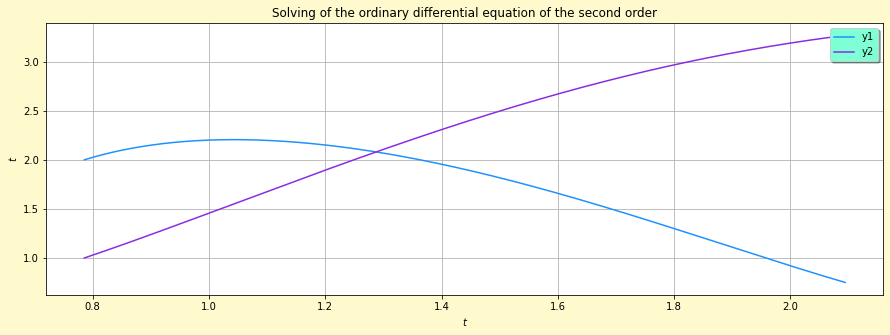

In [ ]:
# формирование о-та рис
fig = plt.figure(figsize=(15, 5),facecolor = 'lemonchiffon')
ax = fig.add_subplot(111)
ax.set(title = 'Solving of the ordinary differential equation of the second order')
ax.set_xlabel('$t$')
ax.set_ylabel('$t$')
ax.plot(ti, y1, color = 'dodgerblue')
ax.plot(ti, y2, color = 'blueviolet')
lgnd = ax.legend(['y1', 'y2'], loc = 'upper right', shadow = True)
lgnd.get_frame().set_facecolor('aquamarine')
plt.grid(True)
plt.show()